In [1]:
import numpy as np
import pandas as pd


In [5]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Check imbalance data

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

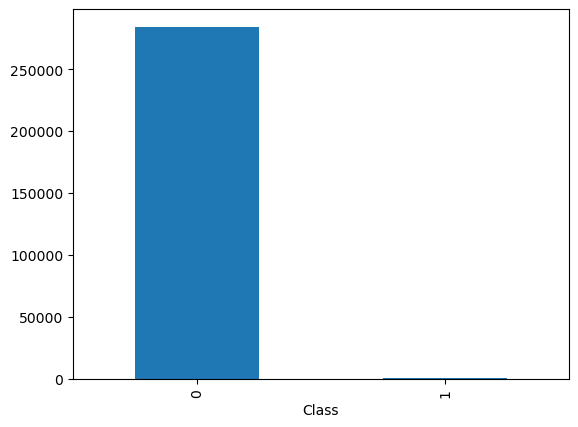

In [14]:
df['Class'].value_counts().plot(kind='bar')


In [16]:
df.shape

(284807, 31)

Actually It was taking too much time on this large dataset so , I am considering only 20000 datasets.

first training model on imbalance data itself

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Predicting on the test set,  # Calculating confusion matrix,   # Calculating classification report,  
## Calculating accuracy
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Confusion Matrix:
[[56861     3]
 [   21    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995786664794073


Apply Sampling Techniques:
1. Random Over Sampler

In [34]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [36]:
y_ros.value_counts()


Class
0    227451
1    227451
Name: count, dtype: int64

In [39]:
# Predicting on the test set,  # Calculating confusion matrix,   # Calculating classification report,  
## Calculating accuracy
rf_model_ros=RandomForestClassifier()
rf_model_ros.fit(X_ros,y_ros)
y_pred_ros = rf_model_ros.predict(X_test)

conf_matrix_ros = confusion_matrix(y_test, y_pred_ros)
print("Confusion Matrix(Random Oversampling):")
print(conf_matrix_ros)

class_report_ros = classification_report(y_test, y_pred_ros)
print("\nClassification Report(Random Oversampling):")
print(class_report_ros)

accuracy_ros = rf_model_ros.score(X_test, y_test)
print("Accuracy (Random Oversampling):", accuracy_ros)

Confusion Matrix(Random Oversampling):
[[56863     1]
 [   21    77]]

Classification Report(Random Oversampling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy (Random Oversampling): 0.9996137776061234


In [41]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomUnderSampler
rus = RandomUnderSampler()

# Perform Random Undersampling
X_rus, y_rus = rus.fit_resample(X_train, y_train)


y_rus.value_counts()


Class
0    394
1    394
Name: count, dtype: int64

In [45]:
# Predicting on the test set,  # Calculating confusion matrix,   # Calculating classification report,  
## Calculating accuracy
rf_model_rus=RandomForestClassifier()
rf_model_rus.fit(X_rus,y_rus)
y_pred_rus = rf_model_rus.predict(X_test)

conf_matrix_rus = confusion_matrix(y_test, y_pred_rus)
print("Confusion Matrix(Random Undersampling):")
print(conf_matrix_rus)

class_report_rus = classification_report(y_test, y_pred_rus)
print("\nClassification Report(Random Undersampling):")
print(class_report_rus)

accuracy_rus = rf_model_rus.score(X_test, y_test)
print("Accuracy (Random Undersampling):", accuracy_rus)

Confusion Matrix(Random Undersampling):
[[55546  1318]
 [    8    90]]

Classification Report(Random Undersampling):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy (Random Undersampling): 0.9767213229872547


Selectiing Random Oversampling for prediction

In [67]:
try:
    inputs_1 = X_test.iloc[[10]].values
    prediction = rf_model_ros.predict(inputs_1)
    print("Actual Class:", y_test.iloc[10])
    print("Predicted Class:", prediction[0])
except Exception as e:
    print("An error occurred:", e)


Actual Class: 0
Predicted Class: 0


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
try:
    inputs_1 = X_test.iloc[[100]].values
    prediction = rf_model_ros.predict(inputs_1)
    print("Actual Class:", y_test.iloc[100])
    print("Predicted Class:", prediction[0])
except Exception as e:
    print("An error occurred:", e)


Actual Class: 0
Predicted Class: 0


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
